In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [8]:
conn=sqlite3.connect('inventory.db')

In [261]:
df=pd.read_sql_query("SELECT * From vendor_sales_summary",conn)

In [263]:
df.to_csv("vendor_sales_summary.csv",index=False)

### Exploratory Data Analysis
1. Previously, we examined the various tables in the databse to identify key variables, understand their relationships, and determine which one should be included in the final analysis.
2. In this plase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understan data patterns, Identify anomalies, and ensure data quality before proceding with further analysis

In [12]:
# summary statistics 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [23]:
numerical_cols=df.select_dtypes(include=np.number).columns


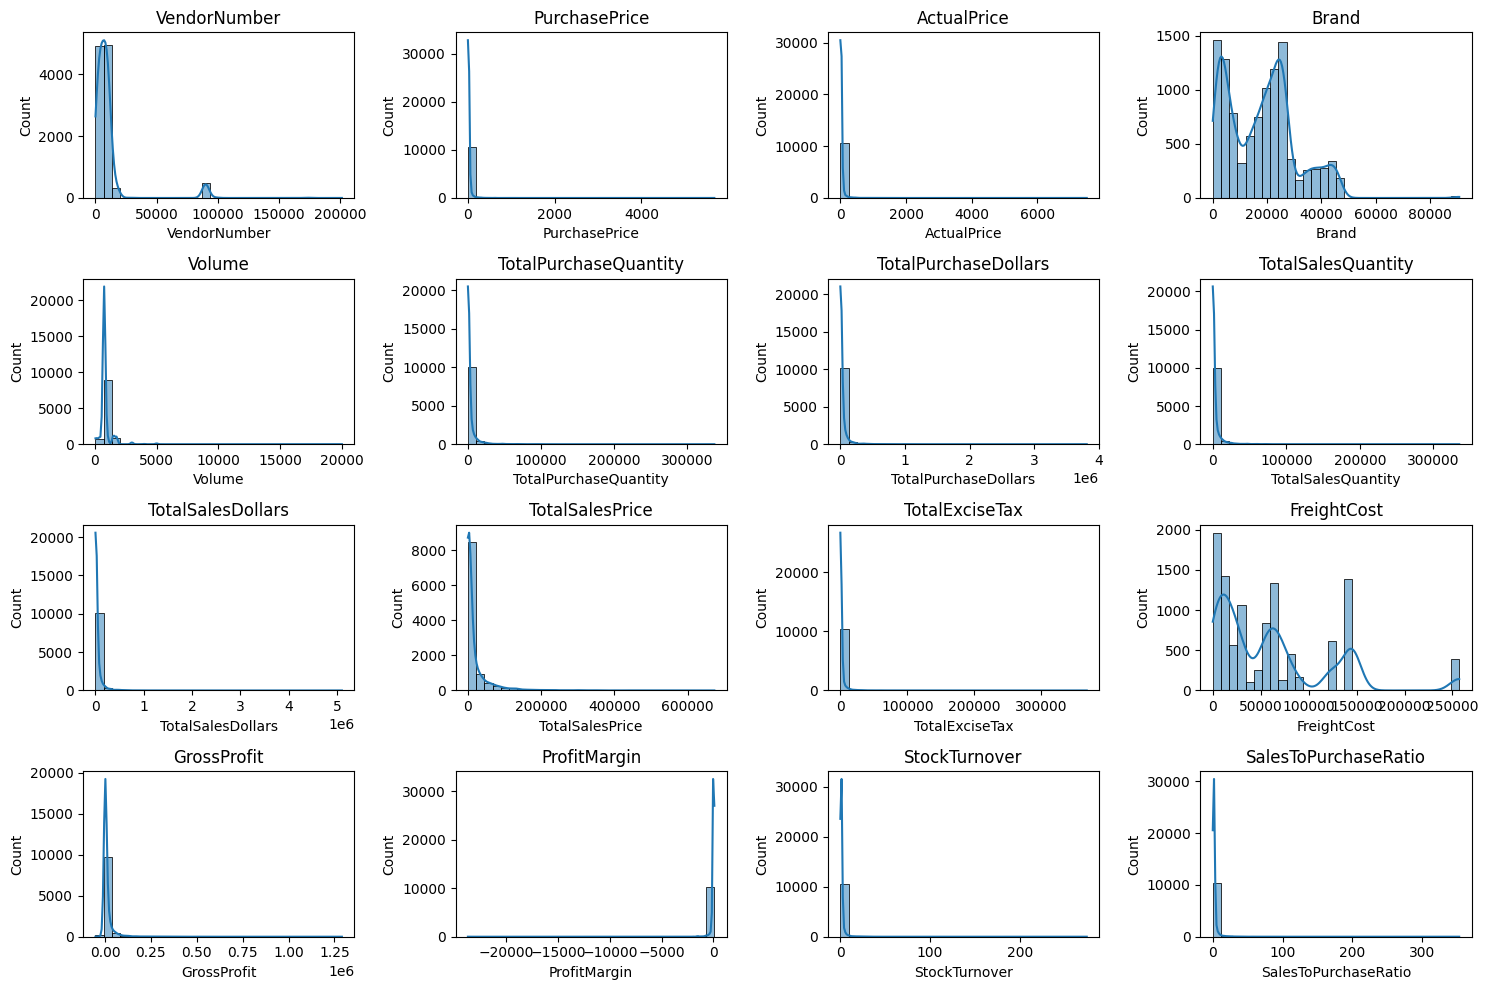

In [24]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4 ,i+1)
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

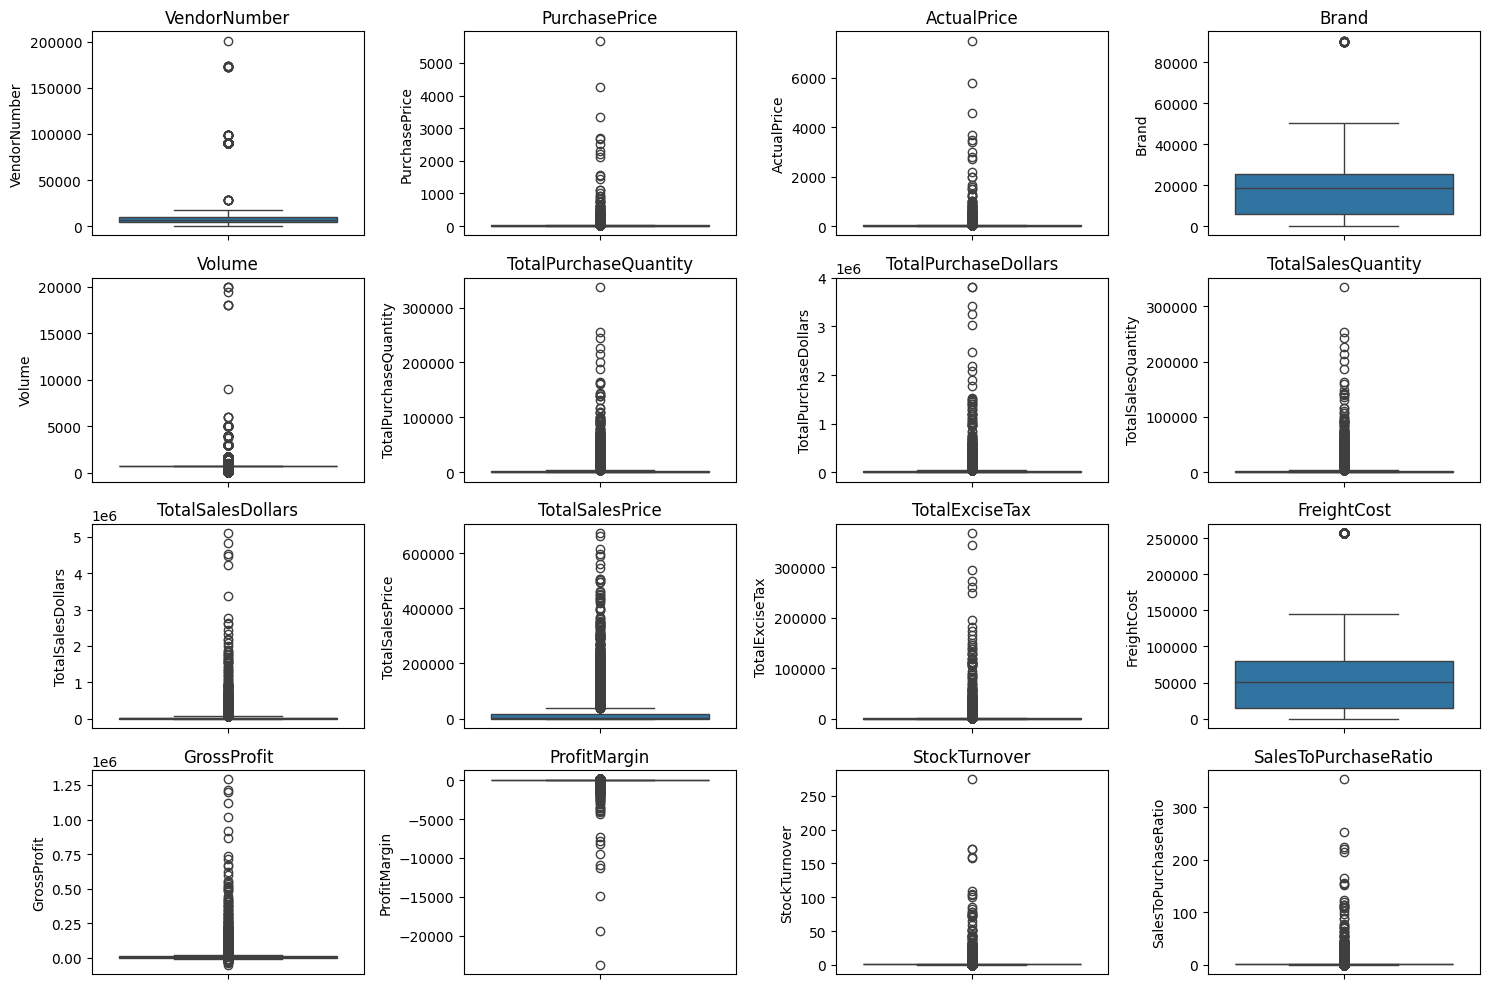

In [28]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [29]:
df=pd.read_sql_query(""" SELECT * 
FROM vendor_sales_summary
WHERE GrossProfit>0
AND ProfitMargin>0
AND TotalSalesQuantity>0""",conn)

In [30]:
df

,VendorNumber,VendorName,Description,PurchasePrice,ActualPrice,Brand,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,26.27,36.99,1233,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,23.19,28.99,3405,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,Absolut 80 Proof,18.24,24.99,8068,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,16.17,22.99,4261,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,21.89,29.99,3545,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,1.32,4.99,8527,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,0.39,0.49,5683,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,0.74,0.99,9123,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,1.47,1.99,6127,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


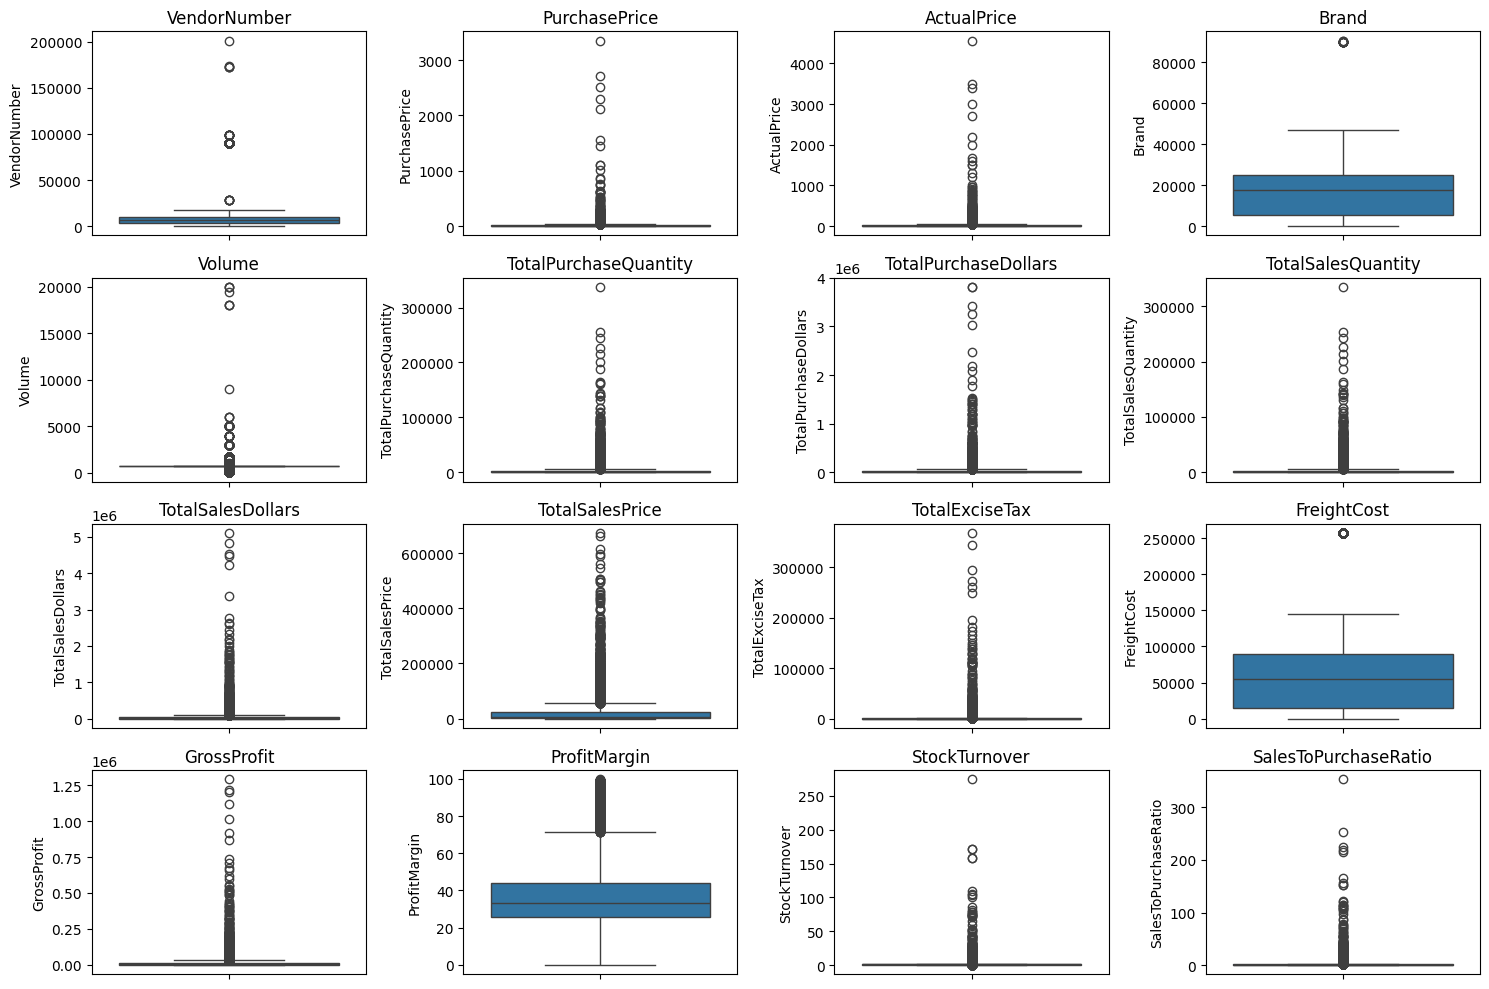

In [31]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

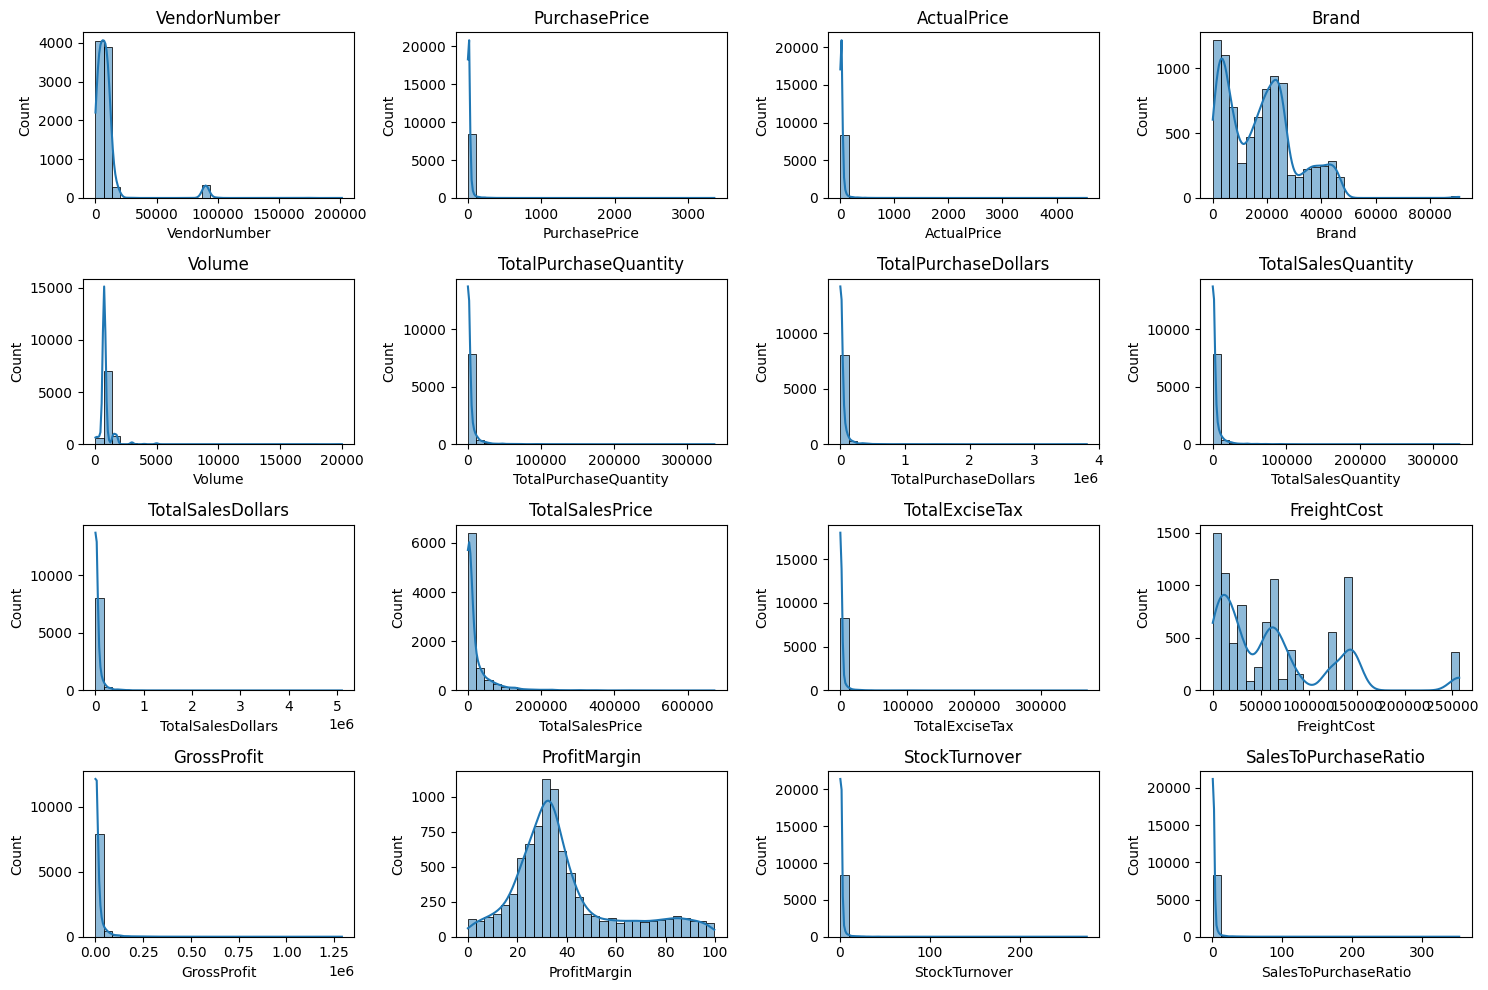

In [32]:
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4 ,i+1)
    sns.histplot(df[col], kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

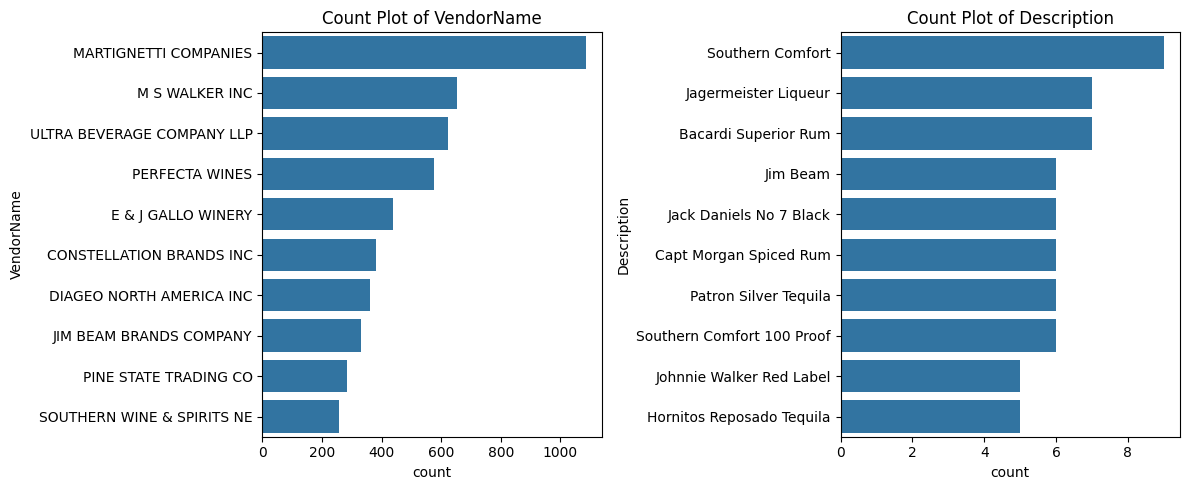

In [37]:
#Count Plot for Categorical Columns

Categorical_cols=["VendorName","Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(Categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

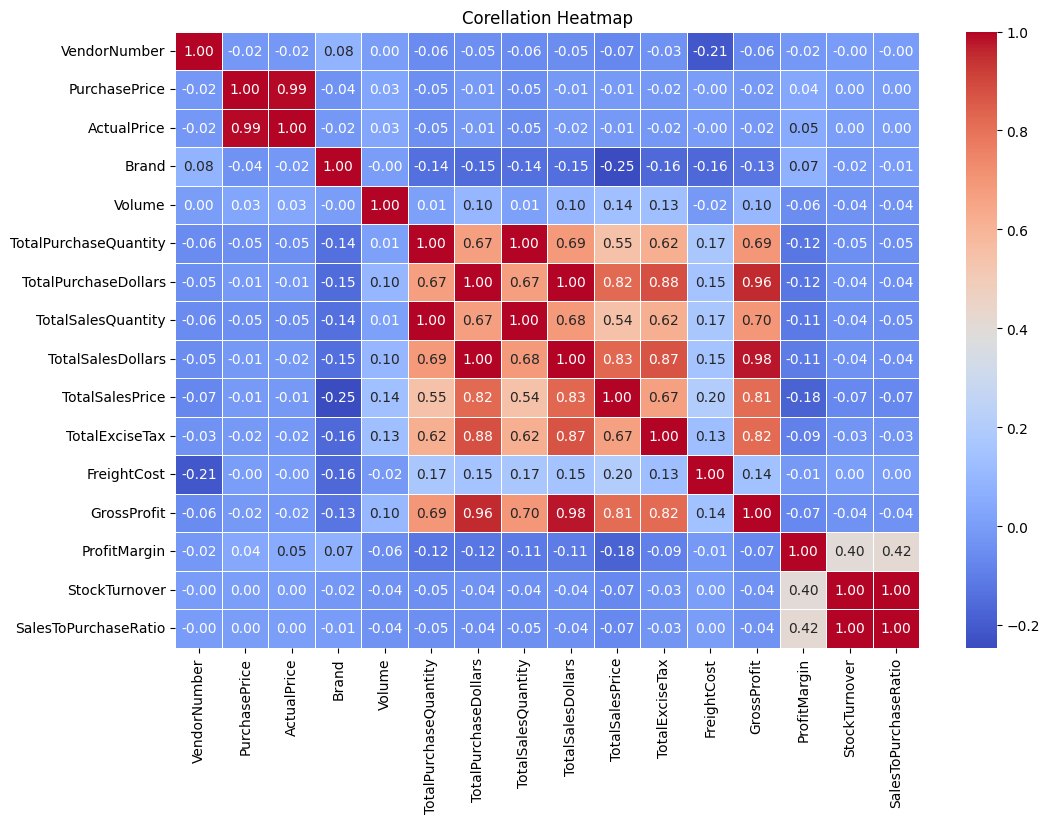

In [39]:
#correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Corellation Heatmap")
plt.show()

1. From the heatmap, it can be clearly seen that if the grossprofit and  PurchasePrice are correlated with each other with the coeffiecent of correlation of 0.96. It means it means higher purchase prices are generally associated with higher gross profits.
2. The coffiecient of correlation between Gross profit and TotalPurchaseQuanity is 0.69. This means purchasing high quanantity of goods gives high gross margin.
3. The coffiecient of correlation between Gross profit and Purchase Price is -0.02, which means gross profit doesnot depend on Purchase Price. 

### Data Analysis
Identify Brands that needs Promotinal or Pricing Adjustment which exhibit lower sales performacne but higher profit margins. 

In [44]:
brand_performance = df.groupby("Description").agg({
    'TotalSalesDollars':'sum',
    "ProfitMargin":'mean'}).reset_index()


In [70]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

In [46]:
low_sales_threshold = brand_performance["TotalSalesDollars"].quantile(0.15)
high_margin_threshold = brand_performance ["ProfitMargin"].quantile(0.85)

In [49]:
high_margin_threshold

np.float64(64.97017552750113)

In [71]:
target_brand=brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) & (brand_performance["ProfitMargin"] >=high_margin_threshold)]

In [72]:
display(target_brand.sort_values("TotalSalesDollars").reset_index())

,index,Description,TotalSalesDollars,ProfitMargin
0,6199,Santa Rita Organic Svgn Bl,9.99,66.466466
1,2369,Debauchery Pnt Nr,11.58,65.975820
2,2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
3,2188,Crown Royal Apple,27.86,89.806174
4,6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...,...
193,5074,Nanbu Bijin Southern Beauty,535.68,76.747312
194,2271,Dad's Hat Rye Whiskey,538.89,81.851584
195,57,A Bichot Clos Marechaudes,539.94,67.740860
196,6245,Sbragia Home Ranch Merlot,549.75,66.444748


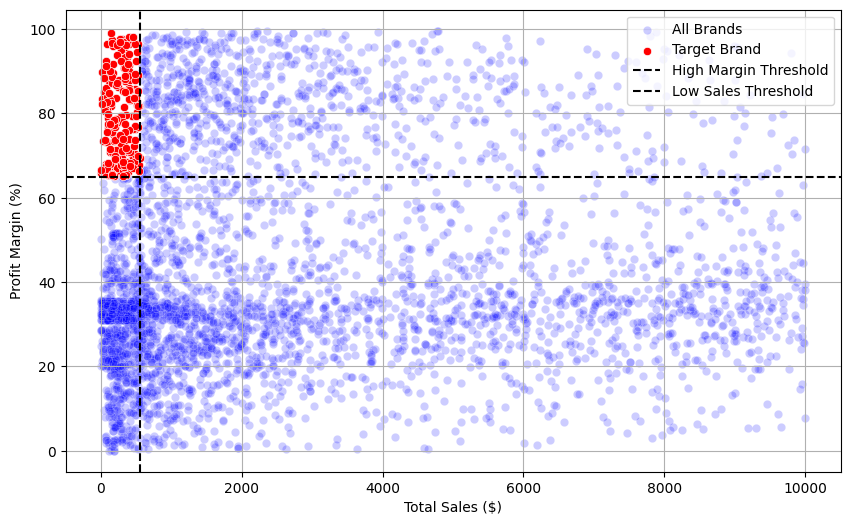

In [118]:
plt.figure(figsize=(10, 6))

# Scatter plots for all brands and target brand
sns.scatterplot(data=brand_performance, x="TotalSalesDollars", y="ProfitMargin", 
                color='blue', label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brand, x="TotalSalesDollars", y="ProfitMargin", 
                color='red', label="Target Brand")

# Horizontal line for high margin threshold
plt.axhline(y=high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')

# Vertical line for low sales threshold
plt.axvline(x=low_sales_threshold, linestyle='--', color='black', label='Low Sales Threshold')

# Labels, legend, and grid
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.legend()
plt.grid(True)
plt.show()


Which vendors and brands demonstrate the highest sales performance?

In [82]:
top_vendor=df.groupby(["VendorName"])["TotalSalesDollars"].sum().nlargest(10)
top_brand=df.groupby(["Description"])["TotalSalesDollars"].sum().nlargest(10)

In [80]:
print(top_vendor)

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64


In [83]:
print(top_brand)

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64


In [88]:
def format_dollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)
        

In [89]:
top_vendor=top_vendor.apply(format_dollars)

In [90]:
top_vendor

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

In [91]:
top_brand=top_brand.apply(format_dollars)

In [92]:
top_brand

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

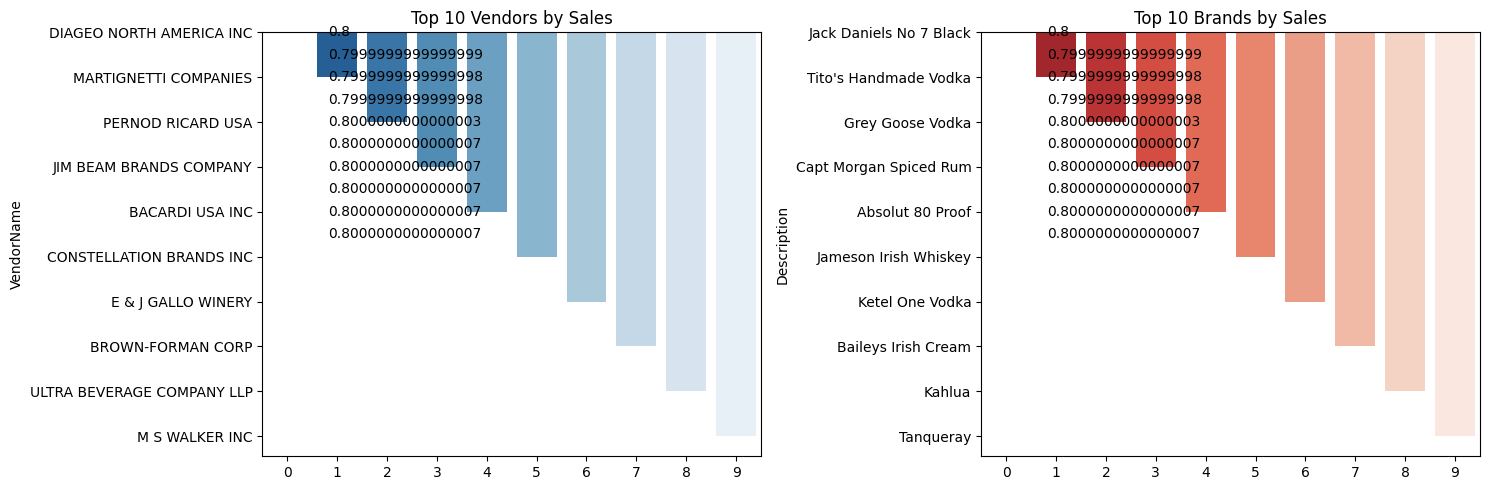

In [126]:
plt.figure(figsize=(15, 5))

# Plot the top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendor.index, x=top_vendor.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

# Format x-axis ticks
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels([format_dollars(x) for x in ax1.get_xticks()])

# Add labels to bars
for bar in ax1.patches:
    ax1.text(bar.get_width() + bar.get_width()*0.02,
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot the top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brand.index, x=top_brand.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

# Format x-axis ticks
ax2.set_xticks(ax2.get_xticks())
ax2.set_xticklabels([format_dollars(x) for x in ax2.get_xticks()])

# Add labels to bars
for bar in ax2.patches:
    ax2.text(bar.get_width() + bar.get_width()*0.02,
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [122]:
top_vendor

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

Which vendors Contribute the most to the total purchase dollars?

In [139]:
vendor_performance=df.groupby("VendorName").agg({
    "TotalPurchaseDollars":"sum",
    "GrossProfit": 'sum',
    "TotalSalesDollars":'sum'}).reset_index()

In [140]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [ ]:
vendor_performance["PurchaseContribution%"]=vendor_performance["TotalPurchaseDollars"]/vendor_performance["TotalPurchaseDollars"].sum())

In [149]:
vendor_performance=round(vendor_performance.sort_values("PurchaseContribution%", ascending=False),2)

In [ ]:
vendor_performance["TotalPurchaseDollars"]=vendor_performance["TotalPurchaseDollars"].apply(format_dollars)
vendor_performance["GrossProfit"]=vendor_performance["GrossProfit"].apply(format_dollars)
vendor_performance["TotalSalesDollars"]=vendor_performance["TotalSalesDollars"].apply(format_dollars)


In [164]:
top_vendor=vendor_performance.head(10)
top_vendor

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [165]:
top_vendor["PurchaseContribution%"]=top_vendor["PurchaseContribution%"]*100
top_vendor

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.0
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.0
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,8.0
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,8.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,6.0
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,5.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,4.0
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,4.0
53,M S WALKER INC,9.76M,4.94M,14.71M,3.0


In [155]:
fig, ax1=plt.figure(figsize=(10,6))

sns.barplot(x=top_vendor["VendorName"],y=top_vendor["PurchaseContribution%"], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors["Purchase_Contribution%"]):
    ax1.text(i, value-1, str(value)+ '%', ha="center", fontsize=10, color='white')


TypeError: cannot unpack non-iterable Figure object

<Figure size 1000x600 with 0 Axes>

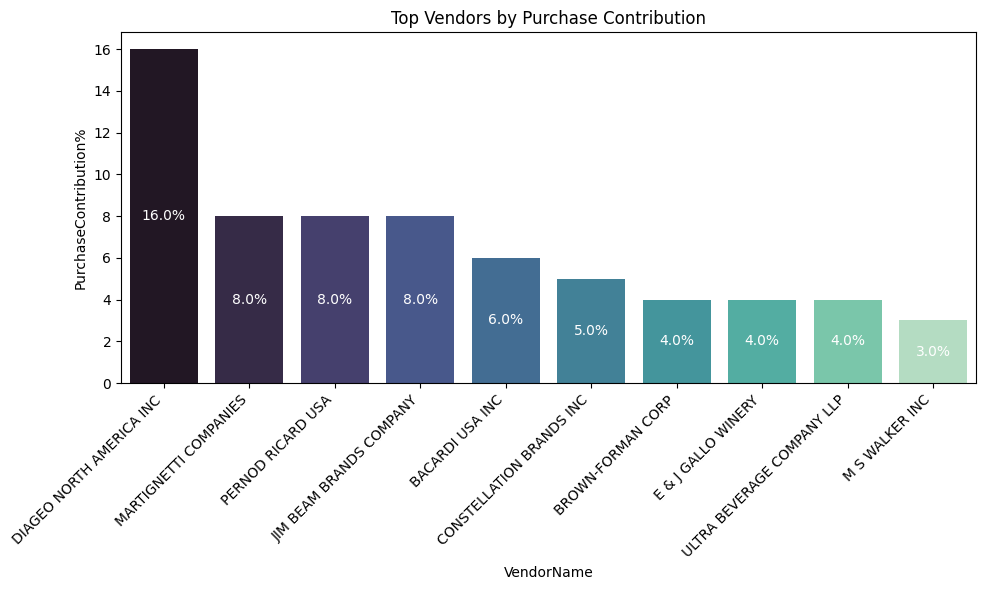

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot
sns.barplot(x=top_vendor["VendorName"], 
            y=top_vendor["PurchaseContribution%"], 
            palette="mako", ax=ax1)

# Add labels inside bars
for i, value in enumerate(top_vendor["PurchaseContribution%"]):
    ax1.text(i, value/2, f"{value}%",  # Half height so text stays inside
             ha="center", va="center", fontsize=10, color='white')



# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha="right")


plt.title("Top Vendors by Purchase Contribution")
plt.tight_layout()
plt.show()


How much of total procurement is dependent on the top vendors?

In [170]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendor['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendors is 66.0 %


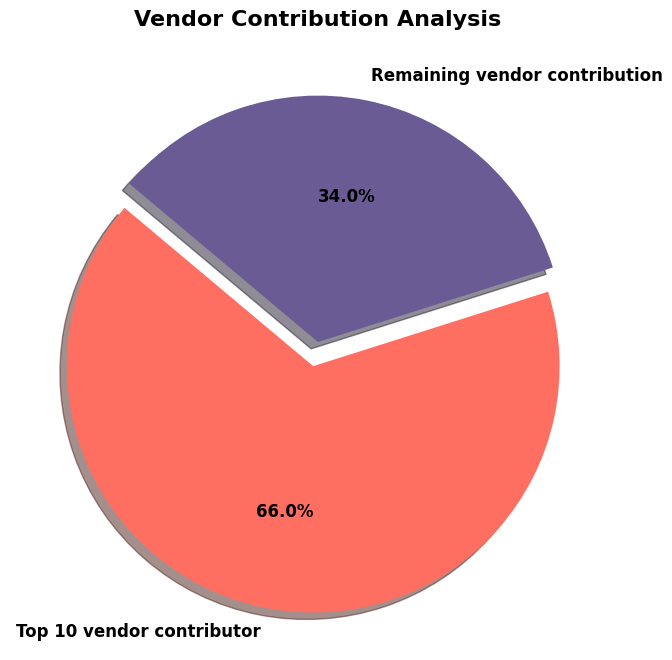

In [178]:
import matplotlib.pyplot as plt

labels = ["Top 10 vendor contributor", "Remaining vendor contribution"]
top_vendor_contribution = round(top_vendor['PurchaseContribution%'].sum(), 2)
remaining_vendor_contribution = 100 - top_vendor_contribution
values = [top_vendor_contribution, remaining_vendor_contribution]

# Colors and explode
colors = ['#FF6F61', '#6B5B95']
explode = (0.1, 0)  # Pull out the first slice

plt.figure(figsize=(8, 8))
plt.pie(
    values,
    labels=labels,           # Ensure labels are provided
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12, 'weight': 'bold', 'color': 'black'}  # Use black for better visibility
)
plt.title("Vendor Contribution Analysis", fontsize=16, weight='bold')
plt.show()


Does pruchasing in bulk reduce the unit price, and what is the optimal purchase vloume for cost savings?

In [179]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'PurchasePrice',
       'ActualPrice', 'Brand', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')

In [184]:
df['UnitPurchasePrice']= round(df['TotalPurchaseDollars']/df['TotalSalesQuantity'],2)

In [189]:
df["OrderSize"]=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=['Small', 'Medium','Large'])

In [187]:
df

,VendorNumber,VendorName,Description,PurchasePrice,ActualPrice,Brand,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,Order Size
0,1128,BROWN-FORMAN CORP,Jack Daniels No 7 Black,26.27,36.99,1233,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.83,Large
1,4425,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,23.19,28.99,3405,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.74,Large
2,17035,PERNOD RICARD USA,Absolut 80 Proof,18.24,24.99,8068,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.27,Large
3,3960,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,16.17,22.99,4261,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.27,Large
4,3960,DIAGEO NORTH AMERICA INC,Ketel One Vodka,21.89,29.99,3545,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,22.26,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,Concannon Glen Ellen Wh Zin,1.32,4.99,8527,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,0.53,Small
8560,8004,SAZERAC CO INC,Dr McGillicuddy's Apple Pie,0.39,0.49,5683,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.02,Small
8561,3924,HEAVEN HILL DISTILLERIES,Deep Eddy Vodka,0.74,0.99,9123,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74,Small
8562,3960,DIAGEO NORTH AMERICA INC,The Club Strawbry Margarita,1.47,1.99,6127,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,0.02,Small


In [191]:
df[["OrderSize","TotalPurchaseQuantity"]]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [192]:
df.groupby("OrderSize")["UnitPurchasePrice"].mean()

OrderSize
Small     28.613428
Medium    15.513992
Large     11.059342
Name: UnitPurchasePrice, dtype: float64

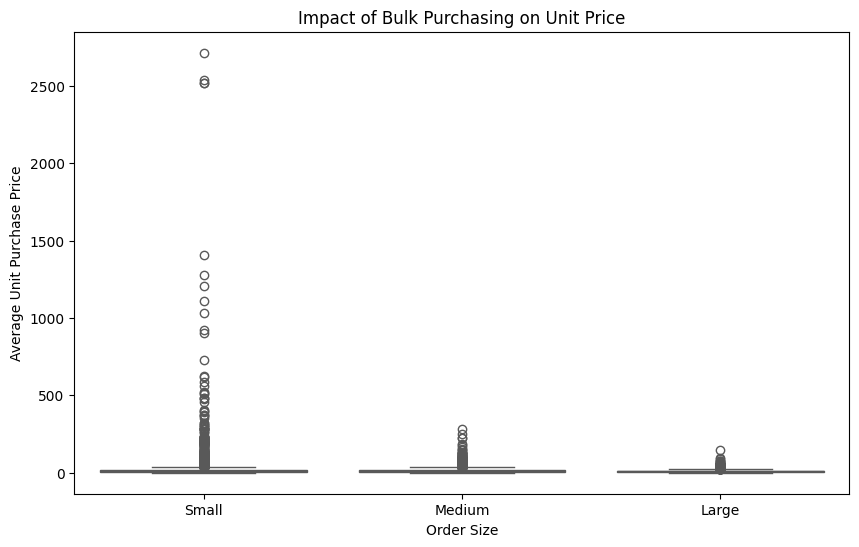

In [194]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

1. Vendor buying in bulk( large Order Size) get lowest unit price ($11.05 per unit), meaning higher margins if they can manage inventory efficiently. 
2. The price differenc between Samll and Large Orders is substaintial (-72% reduction in unit cost)
3. This suggests that bulk pricing strategies succesfully encourage vendors to purchase in larger volumnes, leading  to higher overall sales despite lower per unit revenue.

Which Vendors have low inventory turnover, indicating excess stock and slow- moving products?

In [196]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'PurchasePrice',
       'ActualPrice', 'Brand', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio',
       'UnitPurchasePrice', 'Order Size', 'OrderSize'],
      dtype='object')

In [200]:
df[df["StockTurnover"]<1].groupby("VendorName")[["StockTurnover"]].mean().sort_values("StockTurnover",ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [203]:
df["UnsoldInventoryValue"]=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [201]:
df.columns

Index(['VendorNumber', 'VendorName', 'Description', 'PurchasePrice',
       'ActualPrice', 'Brand', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio',
       'UnitPurchasePrice', 'Order Size', 'OrderSize'],
      dtype='object')

In [204]:
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.

In [255]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [256]:
top_vendors=df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]>=low_threshold]["ProfitMargin"].dropna()

In [231]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [211]:
def confidence_interval(data,confidence=0.95):
    mean_val= np.mean(data)
    std_err= np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical=stats.t.ppf((1+ confidence) / 2, df =len(data)-1)
    margin_of_error=t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

In [241]:
top_mean, top_lower, top_upper =confidence_interval(top_vendors)
low_mean, low_lower, low_upper =confidence_interval(low_vendors)
print(f"Top Vendor 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendor 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

Top Vendor 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendor 95% CI: (37.29, 38.26), Mean: 37.77


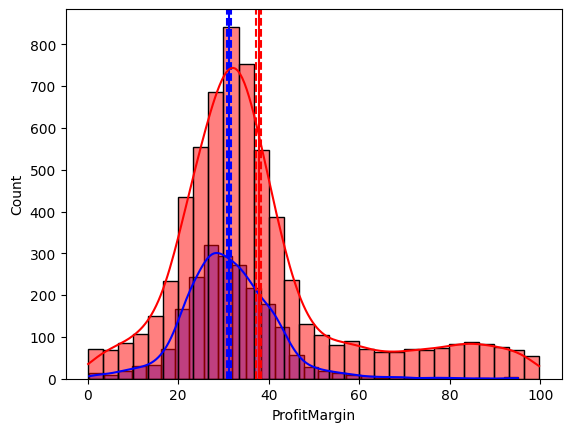

In [257]:
#Top vendors Plot

sns.histplot(top_vendors, kde=True,color="blue",bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_upper, color="blue",linestyle="--", label=f"Top Lower {top_upper: .2f}")
plt.axvline(top_lower, color="blue",linestyle="--", label=f"Top Lower {top_lower: .2f}")
plt.axvline(top_mean, color="blue",linestyle="-", label=f"Top Lower {top_mean: .2f}")

#low vendors Plot

sns.histplot(low_vendors, kde=True,color="red",bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_upper, color="red",linestyle="--", label=f"Top Lower {low_upper: .2f}")
plt.axvline(low_lower, color="red",linestyle="--", label=f"Top Lower {low_lower: .2f}")
plt.axvline(low_mean, color="red",linestyle="-", label=f"Top Lower {low_mean: .2f}")

1. The confidence interval for low performing vendors ( 37.29% to 38.26% ) is significantly higher than that of top- performing vendors (30.74% to 31.61%)
2. This suggests that vendors with lower sales tend to main higher profit margins, potentially due to premium pricing or lower operational costs.
3. For High Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization or bundling strategies.
4. For Low- Performing Vendors: Despite higer margin, their low sales volume might indicate a need for better marketing, competitive pricing  or imporved distribution strategies. 

Is there a significant differnce in profit margins between top- performing and low-performing vendors?
Hypothesis:

Ho(Null Hyptothesis): There is no significant difference in the mean profit margins of top-perfoming and low-performing vendors
H1(Null Hyptothesis): There is significant difference in the mean profit margins of top-perfoming and low-performing vendors

In [260]:
#Perfoming Two Sample T test
t_stat, p_value=ttest_ind(top_vendors, low_vendors, equal_var=False)

print(f"T-statistic: {t_stat: .4f}, P-value: {p_value: 4f}")

if p_value<0.05:
    print("Rejects Null hypothesis: There is significant difference in the mean profit margins of top-perfoming and low-performing vendors")
else:
    print("Fail to reject null hypothesis: There is no significant difference in the mean profit margins of top-perfoming and low-performing vendors")

T-statistic: -19.8217, P-value:  0.000000
Rejects Null hypothesis: There is significant difference in the mean profit margins of top-perfoming and low-performing vendors


In [ ]:
t